# Lecture 5: Parameter learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Case (a)

In [2]:
from scipy.stats import bernoulli

theta_true = 0.5
n_samples = 10 

def draw(n=1):
    return bernoulli.rvs(p=theta_true, size=n)

candies = draw(n_samples)
print(candies)

[0 1 1 0 0 1 0 1 0 0]


## Maximum likelihood estimation

In [3]:
from scipy.optimize import minimize

def log_likelihood(theta, candies):
    if theta < 0 or theta > 1:
        return -np.inf
    return bernoulli.logpmf(candies, p=theta).sum()

r = minimize(lambda *args: -log_likelihood(*args), 
             x0=0.1, args=(candies, ))
theta_mle = r.x[0]
print(theta_mle)

0.3999999948569134


/home/glouppe/anaconda3/envs/dats0001/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [4]:
# ... which should be consistent with the mean
candies.mean()

0.4

## Bayesian parameter estimation

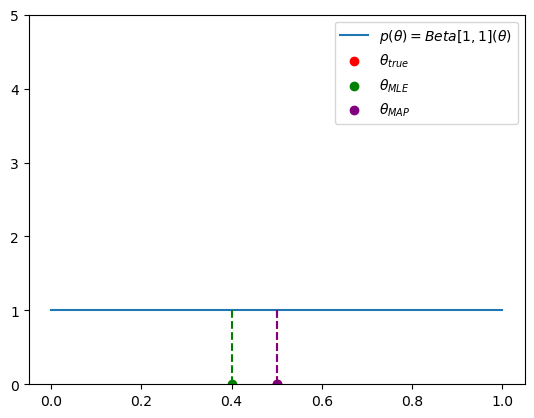

In [5]:
from scipy.stats import beta

def map_estimate(prior, a, b):
    if a > 1 and b > 1:
        return (a - 1) / (a + b - 2)
    elif a == 1 and b == 1:
        return 0.5
    elif a <= 1 and b > 1:
        return 0
    elif a > 1 and b <= 1:
        return 1

def plot_beliefs(prior, a, b):
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(0, 1, 100)
    ax.plot(x, prior.pdf(x), label=r"$p(\theta)=Beta[{}, {}](\theta)$".format(a, b))
    ax.scatter(theta_true, 0, label=r"$\theta_{true}$", color="red")
    ax.vlines(theta_true, 0, prior.pdf(theta_true), color="red", linestyle="--")

    ax.scatter(theta_mle, 0, label=r"$\theta_{MLE}}$", color="green")
    ax.vlines(theta_mle, 0, prior.pdf(theta_mle), color="green", linestyle="--")

    theta_map = map_estimate(prior, a, b)
    ax.scatter(theta_map, 0, label=r"$\theta_{MAP}}$", color="purple")
    ax.vlines(theta_map, 0, prior.pdf(theta_map), color="purple", linestyle="--")

    ax.set(ylim=(0, 5))
    ax.legend()
    plt.show()

# Prior
a, b = 1, 1
prior = beta(a, b)
plot_beliefs(prior, a, b)

In [6]:
i = 0

No more candies!


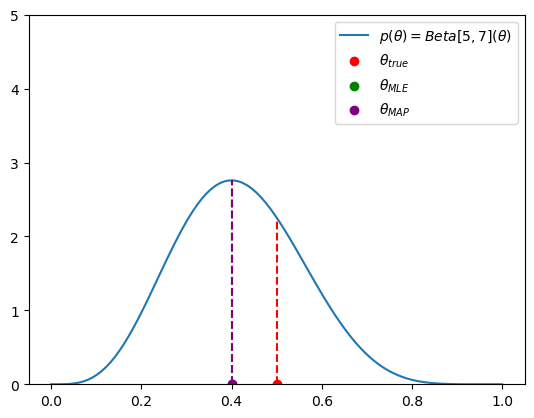

In [17]:
# Update
if i >= len(candies):
    print("No more candies!")
else:
    print("Number of candies eaten: {}".format(i+1))
    flavor = candies[i]
    if flavor == 1:
        a += 1
    else:
        b += 1
    i += 1

prior = beta(a, b)
plot_beliefs(prior, a, b)

In [ ]:
# Why does theta_map converge to theta_mle?